<a href="https://colab.research.google.com/github/TedHaley/courses/blob/master/statistical_thinking_in_python_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

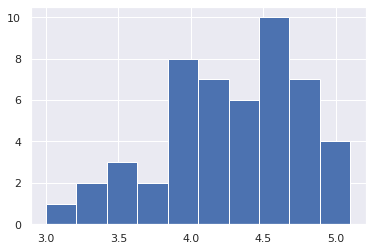

In [1]:
# Import plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

df = pd.DataFrame(data['data'],
        columns=data['feature_names']
    )

df['species'] = data['target']
df['species']=df['species'].apply(lambda x: data['target_names'][x])

df_versicolor = df[df['species']=='versicolor']

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(df_versicolor['petal length (cm)'])

# Show histogram
plt.show()


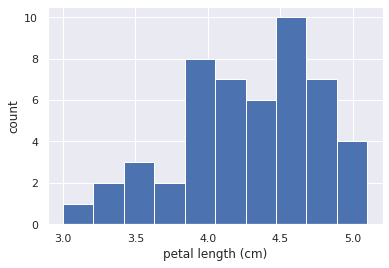

In [2]:
# Setting axis labels
versicolor_petal_length = df_versicolor['petal length (cm)']

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count') 

# Show histogram
plt.show()

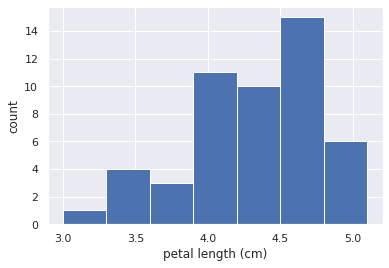

In [3]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

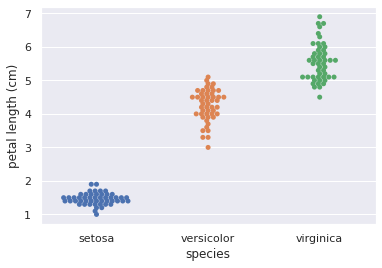

In [4]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [0]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    Empirical distribution function
    """
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

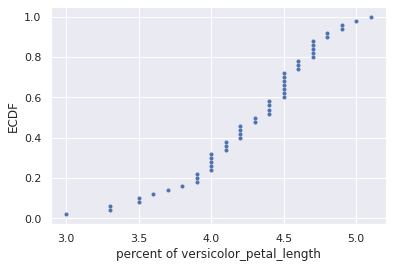

In [7]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('percent of versicolor_petal_length') 
_ = plt.ylabel('ECDF') 

# Display the plot
plt.show()

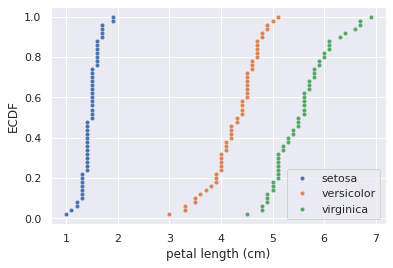

In [9]:
df_setosa = df[df['species']=='setosa']
df_virginica = df[df['species']=='virginica']

setosa_petal_length = df_setosa['petal length (cm)']
virginica_petal_length = df_virginica['petal length (cm)']

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [0]:
# Percentiles
